In [5]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
import math
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline


# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [6]:
#데이터 생성
np.random.seed(100)

math_score=pd.DataFrame(np.random.randint(25,101,size=500),columns=['점수'])

#데이터 확인
scores=np.array(math_score['점수'])
scores[:5]

# 20개(n)의 표본 100번 추출 
n = 20
nsample = 100 

sample_mean = np.array([np.random.choice(scores,n,).mean() for _ in range(nsample)])

# 표본평균 분포 확인 
sample_mean

array([75.9 , 67.  , 61.55, 59.55, 62.6 , 57.95, 57.8 , 59.85, 65.05,
       60.  , 63.05, 60.85, 63.5 , 59.9 , 71.6 , 53.65, 62.9 , 63.25,
       68.85, 60.45, 69.95, 54.6 , 64.15, 66.45, 57.45, 65.75, 61.85,
       59.6 , 63.5 , 53.55, 65.1 , 63.65, 63.3 , 54.6 , 58.85, 49.85,
       61.  , 51.25, 56.3 , 59.95, 62.85, 69.15, 63.4 , 71.15, 62.  ,
       52.6 , 59.65, 59.95, 58.65, 61.4 , 70.85, 56.9 , 62.5 , 65.6 ,
       64.  , 67.6 , 66.5 , 57.85, 62.3 , 58.85, 67.75, 59.05, 62.2 ,
       59.2 , 57.8 , 59.75, 60.  , 66.05, 69.3 , 67.1 , 67.55, 69.85,
       65.7 , 62.95, 50.85, 58.85, 57.05, 63.9 , 57.5 , 55.35, 63.35,
       58.95, 53.35, 64.  , 52.2 , 60.7 , 55.5 , 64.5 , 65.9 , 62.7 ,
       62.2 , 67.2 , 50.2 , 59.4 , 63.95, 54.5 , 60.25, 66.2 , 62.  ,
       63.05])

In [3]:
from scipy.stats import t
t_95 = t.ppf(1-(1-0.95)/2,df=20-1)

In [4]:
t_95

2.093024054408263

In [7]:
sMean = sample_mean.mean()
sStd =  sample_mean.std()

Low_c = sMean - t_95*(sStd / math.sqrt(n))
Upper_c = sMean + t_95*(sStd / math.sqrt(n))
print(Low_c)
print(Upper_c)

print('신뢰구간 :',Upper_c-Low_c)

59.199271219270706
63.951728780729304
신뢰구간 : 4.752457561458598


In [8]:
z_n = 30
sample1 = np.random.choice(scores,n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균',scores.mean())
print('표본평균',z_sMean)
print('모편차',scores.std())
print('표본편차',z_sStd)

모평균 61.58
표본평균 60.25
모편차 21.491849617936563
표본편차 21.137348461905056


In [9]:
z_95 = stats.norm.ppf(1 - (1-0.95)/2)

In [10]:
L_value_1 = round(z_sMean - z_95 * (scores.std()/math.sqrt(z_n)), 2)
U_value_1 = round(z_sMean + z_95 * (scores.std()/math.sqrt(z_n)), 2)
print(L_value_1)
print(U_value_1)

print('신뢰구간 :',U_value_1-L_value_1)

52.56
67.94
신뢰구간 : 15.379999999999995


In [11]:
mStd = 5
mMean = 205
n = 49


z_95_1 = stats.norm.ppf(1 - (1-0.95)/2) # 신뢰구간 


L_value = round(mMean - z_95_1*(mStd/math.sqrt(n)),2)
U_value = round(mMean + z_95_1*(mStd/math.sqrt(n)),2)

print('신뢰구간 :',L_value,'~',U_value)
print('신뢰구간 길이 :',U_value - L_value)

print("{} < {} < {}".format(L_value, mMean, U_value)) 

신뢰구간 : 203.6 ~ 206.4
신뢰구간 길이 : 2.8000000000000114
203.6 < 205 < 206.4


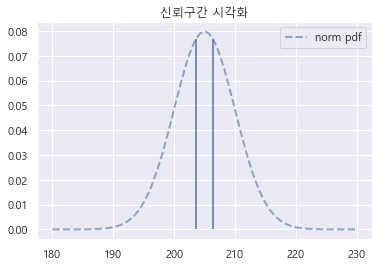

In [18]:
standard_norm = stats.norm(205,5)

x = np.linspace(180,230,100)

plt.vlines(L_value, 0, standard_norm.pdf(L_value), colors="b")
plt.vlines(U_value, 0, standard_norm.pdf(U_value), colors="b")
plt.plot(x, standard_norm.pdf(x),'b--', lw=2, alpha=0.6, label='norm pdf')

plt.title("신뢰구간 시각화")
plt.legend()
plt.show()